**Exercise 1**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [4]:
image_path = "/content/drive/MyDrive/AI and ML/lenna_image.png"
colored_image = Image.open(image_path)

1. Read and display image

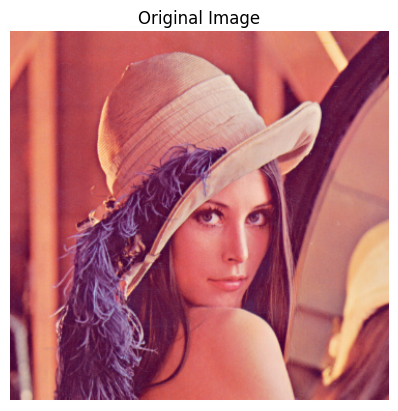

In [5]:
plt.imshow(colored_image)
plt.axis("off")
plt.title("Original Image")
plt.show()


2. Display only the top left corner of 100x100 pixels.

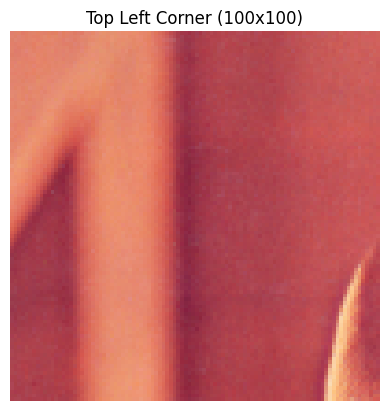

In [6]:
image_array = np.array(colored_image)
top_left = image_array[:100, :100]

plt.imshow(top_left)
plt.axis("off")
plt.title("Top Left Corner (100x100)")
plt.show()

3. Separate the image into its three color channels (Red, Green, and Blue) and display them
individually, labeling each channel as R, G, and B.

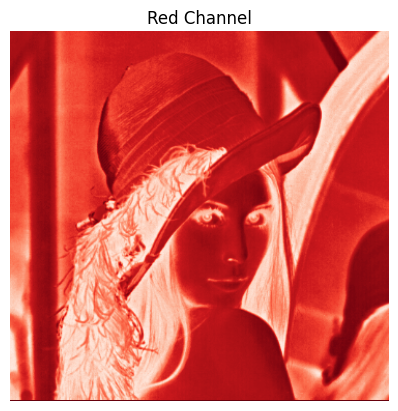

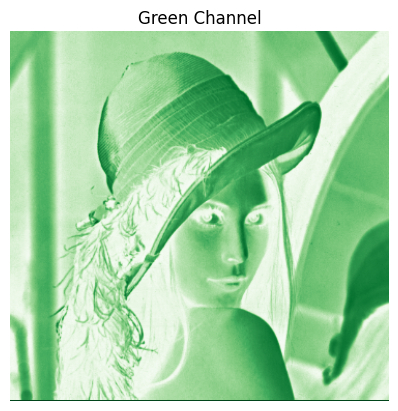

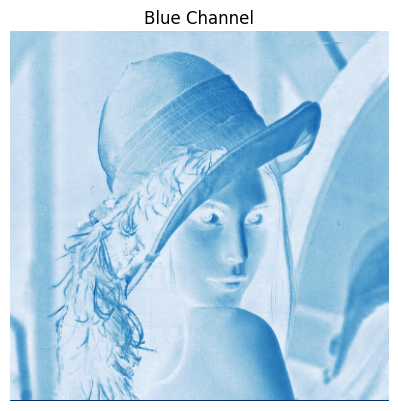

In [7]:
image_array = np.array(colored_image)
r, g, b = image_array[:, :, 0], image_array[:, :, 1], image_array[:, :, 2]

plt.imshow(r, cmap='Reds')
plt.title("Red Channel")
plt.axis("off")
plt.show()

g = image_array[:, :, 1]
plt.imshow(g, cmap='Greens')
plt.title("Green Channel")
plt.axis("off")
plt.show()

b = image_array[:, :, 2]
plt.imshow(b, cmap='Blues')
plt.title("Blue Channel")
plt.axis("off")
plt.show()

4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image: Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a
light gray color), and then display the modified image.

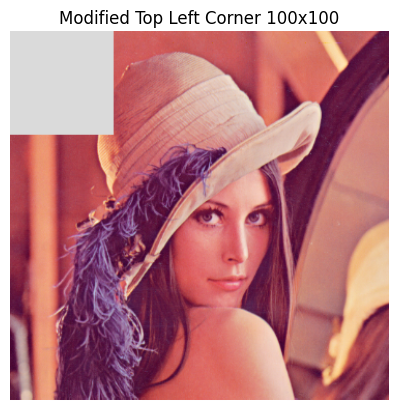

In [9]:
modified_top_left = image_array.copy()
modified_top_left[:100, :100] = 210

plt.imshow(modified_top_left)
plt.axis("off")
plt.title("Modified Top Left Corner 100x100")
plt.show()

**Exercise 2**

1. Load and display a grayscale image.

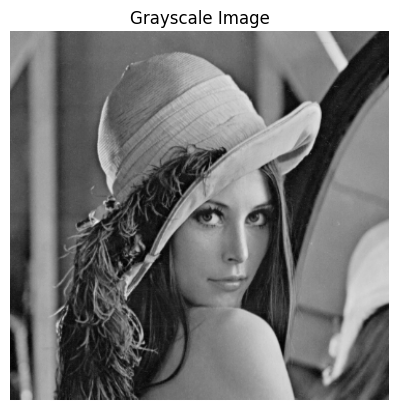

In [10]:
Grayed_image = colored_image.convert('L')
plt.imshow(Grayed_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

2. Extract and display the middle section of the image (150 pixels).

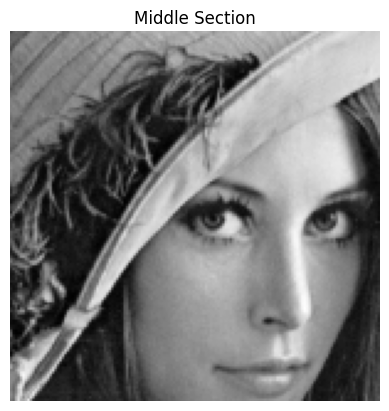

In [13]:
gray_array = np.array(Grayed_image)
height, width = gray_array.shape
middle_section = gray_array[height // 2 - 75:height // 2 + 75, width // 2 - 75:width // 2 + 75]
plt.imshow(middle_section, cmap='gray')
plt.title("Middle Section")
plt.axis("off")
plt.show()

3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).
• Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
above 100 to 255 (creating a binary image).
• Display the resulting binary image.

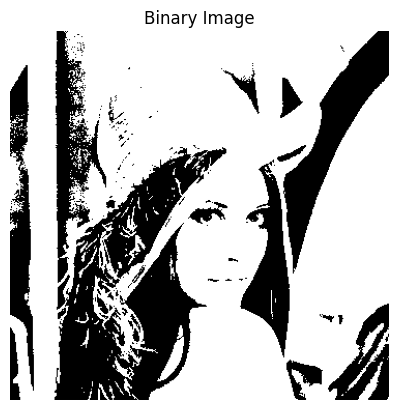

In [16]:
threshold = 100
binary_image = np.where(gray_array < 100, 0, 255)
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.axis("off")
plt.show()

4. Rotate the image 90 degrees clockwise and display the result.

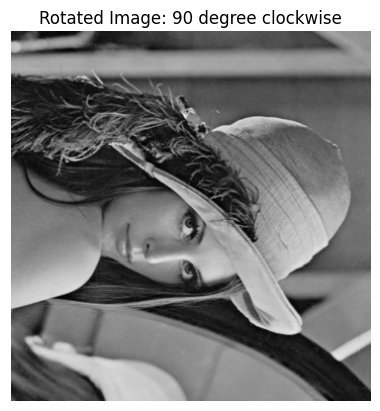

In [18]:
rotate_image = np.rot90(gray_array, k=-1)
plt.imshow(rotate_image, cmap='gray')
plt.title("Rotated Image: 90 degree clockwise")
plt.axis("off")
plt.show()

5. Convert the grayscale image to an RGB image.

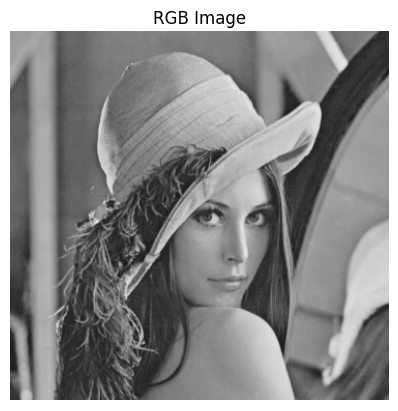

In [19]:
RGB_Image = Grayed_image.convert('RGB')
plt.imshow(RGB_Image)
plt.title("RGB Image")
plt.axis("off")
plt.show()

**Exercise 3**

1. Load and Prepare Data:

• Fetch an image of you choice.{If colour convert to grayscale}



In [54]:
image_path = "/content/drive/MyDrive/AI and ML/lenna_image.png"
image = Image.open(image_path).convert("L")
image_array = np.array(image, dtype=np.float64)

• Standaridze the Data.

In [55]:
mean = np.mean(image_array)
standardized_data = image_array - mean


• Compute PCA

In [56]:
covariance_matrix = np.cov(standardized_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]



*   Reconstruct image and display results.








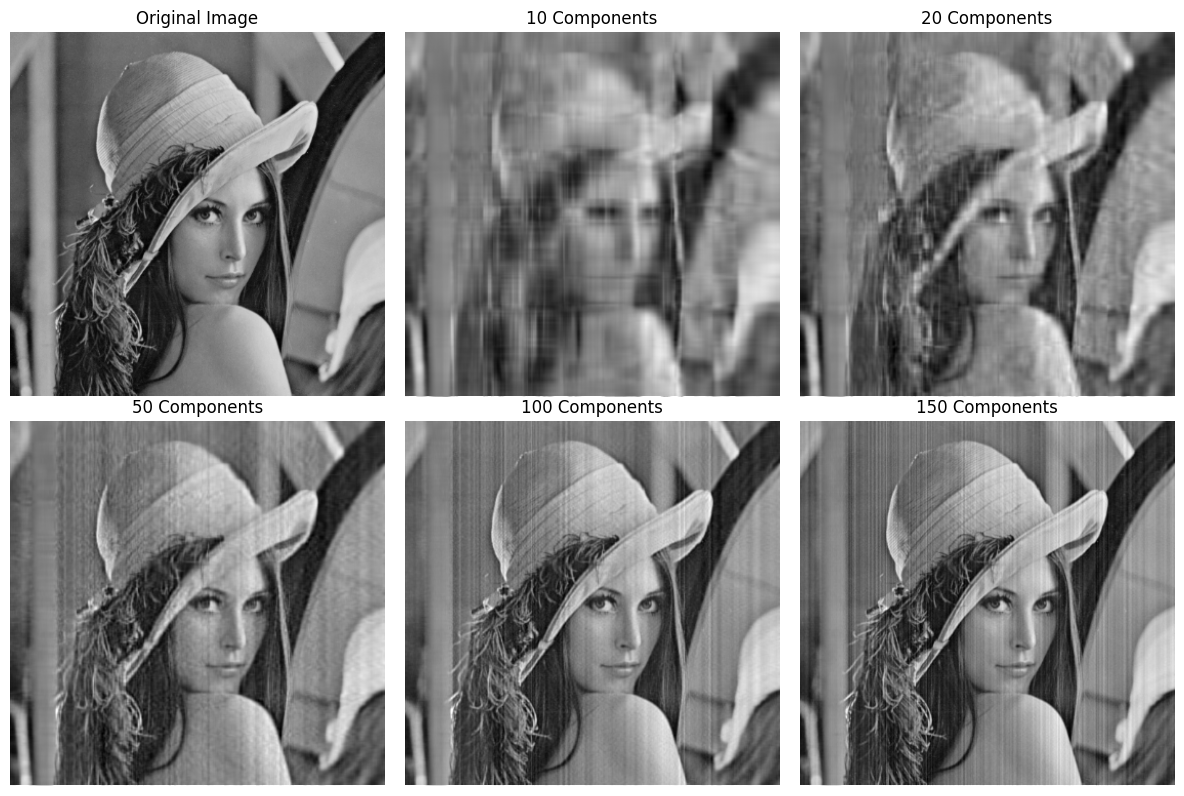

In [57]:
num_components_list = [10, 20, 50, 100, 150]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes[0, 0].imshow(image_array, cmap="gray")
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

for i, num_components in enumerate(num_components_list):
    top_eigenvectors = eigenvectors[:, :num_components]
    reduced_data = np.dot(standardized_data, top_eigenvectors)
    reconstructed_data = np.dot(reduced_data, top_eigenvectors.T) + mean
    reconstructed_data = np.clip(reconstructed_data, 0, 255)

    ax = axes[(i + 1) // 3, (i + 1) % 3]
    ax.imshow(reconstructed_data, cmap="gray")
    ax.set_title(f"{num_components} Components")
    ax.axis("off")

axes[1, 2].axis("off")

plt.tight_layout()
plt.show()